In [2]:
import requests
import os
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import math
import numpy as np

INTERIM_PATH="data/interim/ENIGH"
RAW_PATH="data/raw/DATOS EDUCACION/ENCUESTA NACIONAL DE INGRESOS Y GASTOS EN LOS HOGARES/Extracted"


In [3]:
os.chdir('..')

## Most/least illiterate state

In [26]:
data_path=f"{RAW_PATH}/2022/conjunto_de_datos_poblacion_enigh2022_ns/conjunto_de_datos/conjunto_de_datos_poblacion_enigh2022_ns.csv"
df_2022=pd.read_csv(data_path)

/var/folders/m5/26l5nfs54r94_664jm4k6zvr0000gn/T/ipykernel_11413/656313294.py:2: DtypeWarning: Columns (82,83,166) have mixed types. Specify dtype option on import or set low_memory=False.
  df_2022=pd.read_csv(data_path)


In [86]:
df_2022=df_2022[ [
                'folioviv', 'foliohog', 'numren', 'parentesco', 'sexo', 'edad',
                'madre_hog', 'madre_id', 'padre_hog','alfabetism',
                'asis_esc', 'nivel', 'grado', 'tipoesc', 'tiene_b', 'otorg_b',
                'forma_b', 'tiene_c', 'otorg_c', 'forma_c', 'nivelaprob', 'gradoaprob',
                'antec_esc', 'residencia', 'edo_conyug', 'pareja_hog', 'conyuge_id','peso',
                'entidad'
                ] ]

In [87]:
state=df_2022[['entidad','edad','alfabetism']]
state=state[state['alfabetism']!=' '] # Only people who are 2 or less years old have ' ' registered 

total_state=state.groupby('entidad',as_index=False).value_counts()
total_state=total_state.groupby('entidad',as_index=False)['count'].sum()
total_state=total_state.rename(columns={'count':'total_registers'})

literacy=state[['entidad','alfabetism']].groupby(['entidad','alfabetism'],as_index=False).value_counts()

literacy=pd.merge(literacy,total_state, how='inner', on='entidad')

state=pd.merge(state,total_state, how='inner', on='entidad')

illiterate=state[state['alfabetism']=='1']
literate=state[state['alfabetism']=='2']


In [88]:
def percentage(data_df,category_column,category_value):
    is_category=data_df[category_column]==category_value
    df=data_df[is_category]
    total_of_category=len(df)
    total_of_registers=len(data_df)
    percentage=round(100*(total_of_category/total_of_registers),2)
    return percentage

In [109]:

literacy=state[['entidad','alfabetism']].groupby(['entidad','alfabetism'],as_index=False).value_counts()

literacy=pd.merge(literacy,total_state, how='inner', on='entidad')
literacy['illiteracy_percentage']=literacy['count']/literacy['total_registers']
literacy['literacy_percentage']=1-literacy['illiteracy_percentage']
literacy['illiteracy_percentage_diff']=abs(literacy['illiteracy_percentage']-literacy['literacy_percentage'])




In [110]:
literacy[:100]

,entidad,alfabetism,count,total_registers,illiteracy_percentage,literacy_percentage,illiteracy_percentage_diff
0,1,1,8608,9424,0.913413,0.086587,0.826825
1,1,2,816,9424,0.086587,0.913413,0.826825
2,2,1,12027,13080,0.919495,0.080505,0.838991
3,2,2,1053,13080,0.080505,0.919495,0.838991
4,3,1,7515,8156,0.921408,0.078592,0.842815
...,...,...,...,...,...,...,...
59,30,2,1197,9077,0.131872,0.868128,0.736256
60,31,1,8815,10082,0.874330,0.125670,0.748661
61,31,2,1267,10082,0.125670,0.874330,0.748661
62,32,1,7801,8629,0.904045,0.095955,0.808089


/var/folders/m5/26l5nfs54r94_664jm4k6zvr0000gn/T/ipykernel_11413/10285548.py:11: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(title='Entidad', bbox_to_anchor=(1.05, 1), loc='upper left')  # Adjust legend


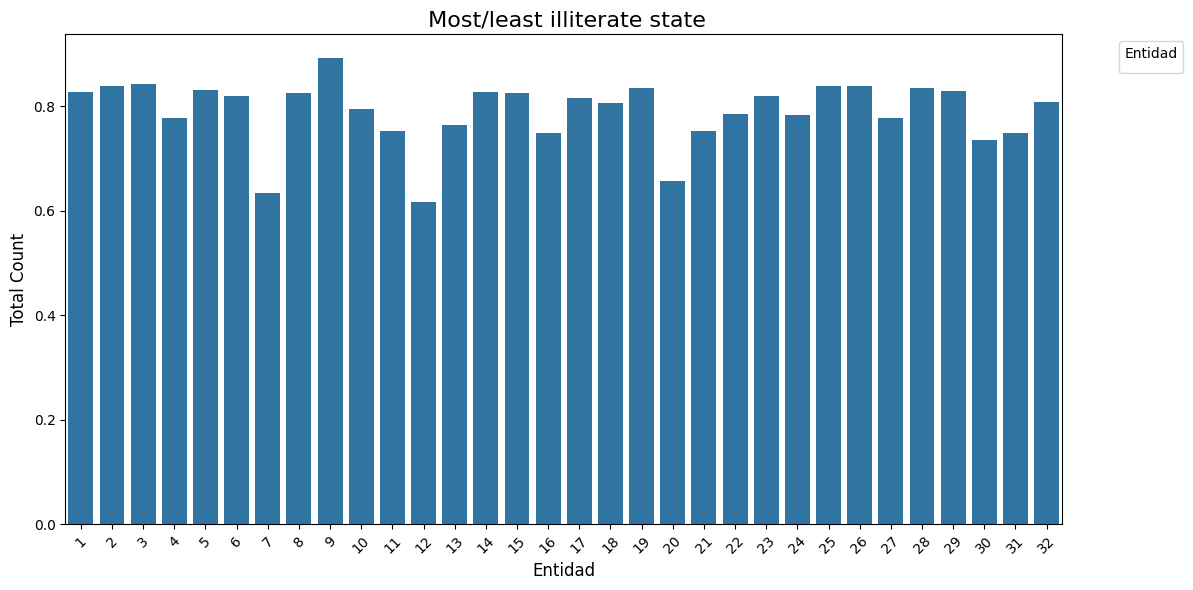

In [113]:
plt.figure(figsize=(12, 6))  # Set the figure size
data=literacy

# Using Seaborn for a more elegant bar plot
sns.barplot(x='entidad', y='illiteracy_percentage_diff', data=data)
# Step 3: Customize the plot
plt.title(' Most/least illiterate state', fontsize=16)
plt.xlabel('Entidad', fontsize=12)
plt.ylabel('Total Count', fontsize=12)
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.legend(title='Entidad', bbox_to_anchor=(1.05, 1), loc='upper left')  # Adjust legend

# Step 4: Show the plot
plt.tight_layout()  # Adjust layout to make room for the legend
plt.show()

In [74]:
illiterate_percentage=percentage(state,'alfabetism','1')
illiterate_percentage

89.65

In [75]:
total_interviews=len(df_2022)
total_illiterate=len(illiterate)
total_literate=len(literate)

In [76]:
illiterate=illiterate.groupby('entidad',as_index=False).value_counts()

# Age Groups
bins = range(0, 101, 10)  # Bins for age groups (0-9, 10-19, 20-29, etc.)
labels = [f'{i}-{i+9}' for i in range(0, 100, 10)]  # Labels for the bins
illiterate['age_group'] = pd.cut(illiterate['edad'], bins=bins, labels=labels, right=False)

# Totals 



literate=literate.groupby('entidad',as_index=False).value_counts()
bins = range(0, 101, 10)  # Bins for age groups (0-9, 10-19, 20-29, etc.)
labels = [f'{i}-{i+9}' for i in range(0, 100, 10)]  # Labels for the bins
literate['age_group'] = pd.cut(literate['edad'], bins=bins, labels=labels, right=False)

In [77]:
state

,entidad,edad,alfabetism,total_registers
0,1,91,1,9424
1,1,48,1,9424
2,1,13,1,9424
3,1,68,1,9424
4,1,64,1,9424
...,...,...,...,...
298207,32,5,2,8629
298208,32,63,1,8629
298209,32,59,1,8629
298210,32,29,1,8629


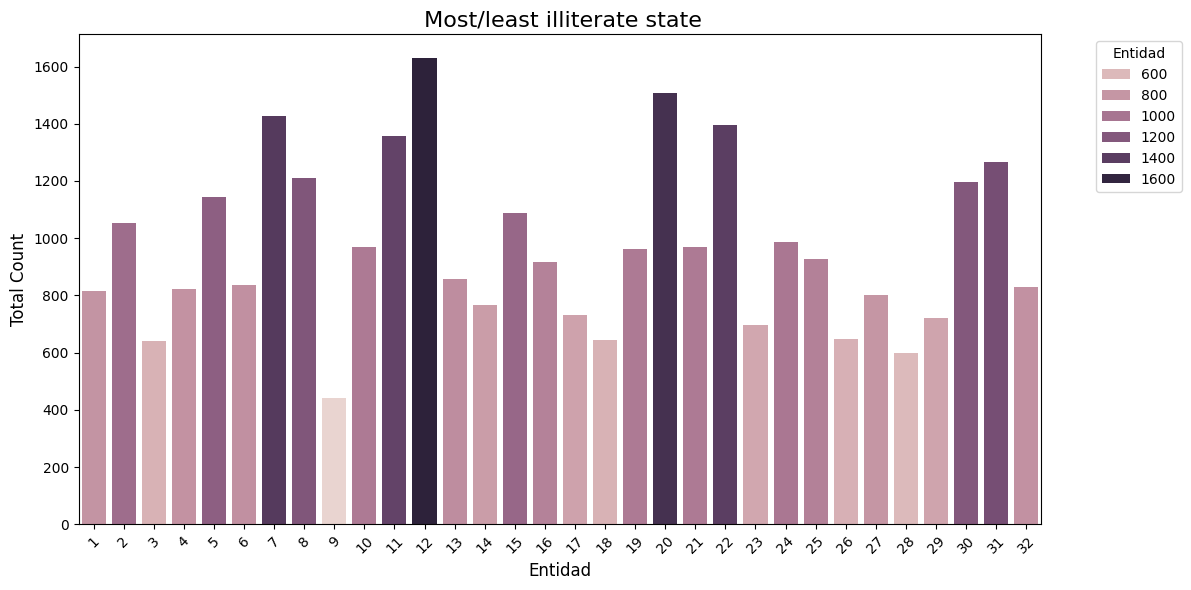

In [78]:
plt.figure(figsize=(12, 6))  # Set the figure size
data=literate.groupby(['entidad'], as_index=False)['count'].sum()
data=data.sort_values(by='count', ascending=False)

# Using Seaborn for a more elegant bar plot
sns.barplot(x='entidad', y='count', hue='count', data=data)
# Step 3: Customize the plot
plt.title(' Most/least illiterate state', fontsize=16)
plt.xlabel('Entidad', fontsize=12)
plt.ylabel('Total Count', fontsize=12)
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.legend(title='Entidad', bbox_to_anchor=(1.05, 1), loc='upper left')  # Adjust legend

# Step 4: Show the plot
plt.tight_layout()  # Adjust layout to make room for the legend
plt.show()

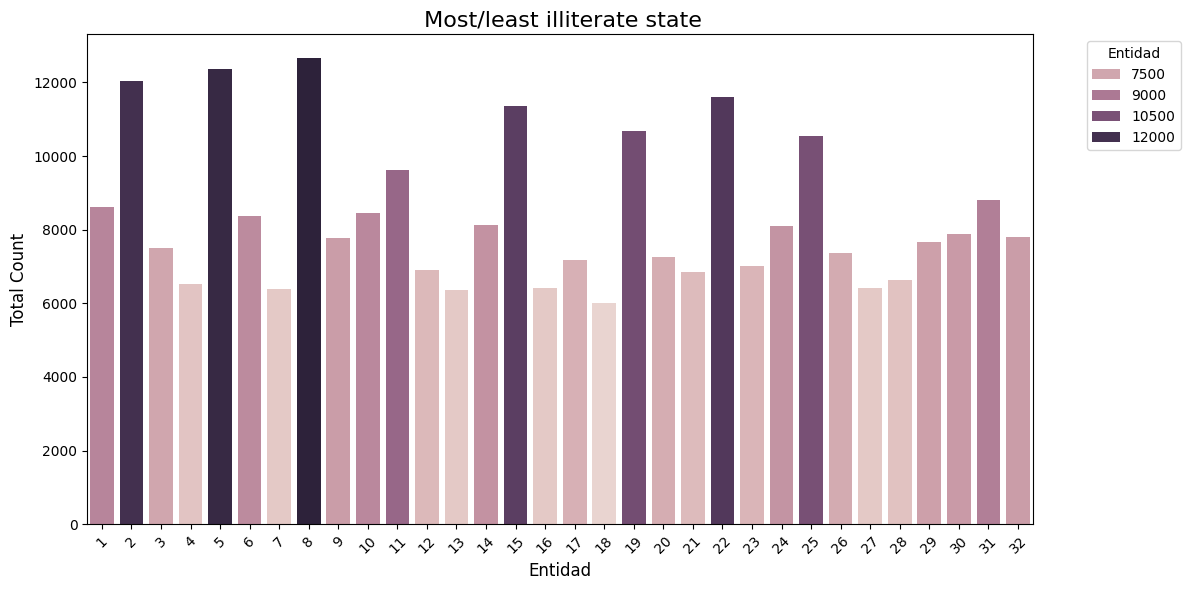

In [79]:
plt.figure(figsize=(12, 6))  # Set the figure size
data=illiterate.groupby(['entidad'], as_index=False)['count'].sum()
data=data.sort_values(by='count', ascending=False)

# Using Seaborn for a more elegant bar plot
sns.barplot(x='entidad', y='count', hue='count', data=data)
# Step 3: Customize the plot
plt.title(' Most/least illiterate state', fontsize=16)
plt.xlabel('Entidad', fontsize=12)
plt.ylabel('Total Count', fontsize=12)
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.legend(title='Entidad', bbox_to_anchor=(1.05, 1), loc='upper left')  # Adjust legend

# Step 4: Show the plot
plt.tight_layout()  # Adjust layout to make room for the legend
plt.show()

## Type of scholarship has most/least amount of illiteracy

In [4]:
data_path=f"{RAW_PATH}/2022/conjunto_de_datos_poblacion_enigh2022_ns/conjunto_de_datos/conjunto_de_datos_poblacion_enigh2022_ns.csv"
df_2022=pd.read_csv(data_path)

/var/folders/m5/26l5nfs54r94_664jm4k6zvr0000gn/T/ipykernel_16775/656313294.py:2: DtypeWarning: Columns (82,83,166) have mixed types. Specify dtype option on import or set low_memory=False.
  df_2022=pd.read_csv(data_path)


In [5]:
df_2022=df_2022[ [
                'folioviv', 'foliohog', 'numren', 'parentesco', 'sexo', 'edad',
                'madre_hog', 'madre_id', 'padre_hog','alfabetism',
                'asis_esc', 'nivel', 'grado', 'tipoesc', 'tiene_b', 'otorg_b',
                'forma_b', 'tiene_c', 'otorg_c', 'forma_c', 'nivelaprob', 'gradoaprob',
                'antec_esc', 'residencia', 'edo_conyug', 'pareja_hog', 'conyuge_id','peso',
                'entidad'
                ] ]

In [23]:
state=df_2022[['entidad','edad','alfabetism','tipoesc']]
state=state[state['alfabetism']!=' '] # Only people who are 2 or less years old have ' ' registered 

total_state=state.groupby(['entidad','tipoesc'],as_index=False).value_counts()
total_state=total_state.groupby(['entidad','tipoesc'],as_index=False)['count'].sum()
total_state=total_state.rename(columns={'count':'total_registers'})


literacy=state[['entidad','tipoesc','alfabetism']].groupby(['entidad','tipoesc','alfabetism'],as_index=False).value_counts()
literacy=pd.merge(literacy,total_state, how='inner', on=['entidad','tipoesc'])
literacy['illiteracy_percentage']=literacy['count']/literacy['total_registers']
literacy['literacy_percentage']=1-literacy['illiteracy_percentage']
literacy['illiteracy_percentage_diff']=abs(literacy['illiteracy_percentage']-literacy['literacy_percentage'])


#state=pd.merge(state,total_state, how='inner', on='entidad')

illiterate=state[state['alfabetism']=='1']
literate=state[state['alfabetism']=='2']


In [24]:
literacy

,entidad,tipoesc,alfabetism,count,total_registers,illiteracy_percentage,literacy_percentage,illiteracy_percentage_diff
0,1,,1,6143,6501,0.944932,0.055068,0.889863
1,1,,2,358,6501,0.055068,0.944932,0.889863
2,1,1,1,2172,2597,0.836350,0.163650,0.672699
3,1,1,2,425,2597,0.163650,0.836350,0.672699
4,1,2,1,293,326,0.898773,0.101227,0.797546
...,...,...,...,...,...,...,...,...
220,32,1,2,472,2485,0.189940,0.810060,0.620121
221,32,2,1,149,163,0.914110,0.085890,0.828221
222,32,2,2,14,163,0.085890,0.914110,0.828221
223,32,3,1,4,6,0.666667,0.333333,0.333333


## Trimestral bills/income of illiterate and literate people

In [27]:
data_path=f"{INTERIM_PATH}/2022.csv"
df_2022=pd.read_csv(data_path)
df_2022=df_2022[ [
                'folioviv', 'foliohog', 'numren', 'parentesco', 'sexo', 'edad',
                'madre_hog', 'madre_id', 'padre_hog','alfabetism',
                'asis_esc', 'nivel', 'grado', 'tipoesc', 'tiene_b', 'otorg_b',
                'forma_b', 'tiene_c', 'otorg_c', 'forma_c', 'nivelaprob', 'gradoaprob',
                'antec_esc', 'residencia', 'edo_conyug', 'pareja_hog', 'conyuge_id','peso',
                'entidad',


                'ing_tri'
                ] ]

/var/folders/m5/26l5nfs54r94_664jm4k6zvr0000gn/T/ipykernel_16775/1404386105.py:2: DtypeWarning: Columns (11,12,13,14,15,16,17,18,27,31,32,33,43,44) have mixed types. Specify dtype option on import or set low_memory=False.
  df_2022=pd.read_csv(data_path)


In [ ]:
state=df_2022[['entidad','edad','alfabetism','ing_tri']]
state=state[state['alfabetism']!=' '] # Only people who are 2 or less years old have ' ' registered 

total_state=state.groupby(['entidad','tipoesc'],as_index=False).value_counts()
total_state=total_state.groupby(['entidad','tipoesc'],as_index=False)['count'].sum()
total_state=total_state.rename(columns={'count':'total_registers'})


literacy=state[['entidad','tipoesc','alfabetism']].groupby(['entidad','tipoesc','alfabetism'],as_index=False).value_counts()
literacy=pd.merge(literacy,total_state, how='inner', on=['entidad','tipoesc'])
literacy['illiteracy_percentage']=literacy['count']/literacy['total_registers']
literacy['literacy_percentage']=1-literacy['illiteracy_percentage']
literacy['illiteracy_percentage_diff']=abs(literacy['illiteracy_percentage']-literacy['literacy_percentage'])


#state=pd.merge(state,total_state, how='inner', on='entidad')

illiterate=state[state['alfabetism']=='1']
literate=state[state['alfabetism']=='2']


## Ages/Generations with illiteracy

In [ ]:
bins = [1901,1924,1945, 1964, 1980, 1996, 2012, 2024 ]  # Define the edges of the bins
labels = ['Greatest','Silent','Baby Boomer', 'X', 'Milenial', 'Z','Alpha']  # Define labels for the categories

df['año_nacimiento']=int(2022)-df['edad']
df['generacion'] = pd.cut(df['año_nacimiento'], bins=bins, labels=labels, right=True)